In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


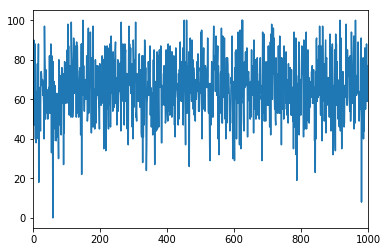

In [6]:
df['math score'].plot()

Status:
* 0:Fail
* 1:Pass

In [7]:
thresold = 40

df['math status']    = np.where(df['math score']<thresold,0,1)
df['reading status'] = np.where(df['reading score']<thresold,0,1)
df['writing status'] = np.where(df['writing score']<thresold,0,1)

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1
1,female,group C,some college,standard,completed,69,90,88,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,1
4,male,group C,some college,standard,none,76,78,75,1,1,1


In [9]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [10]:
df['math status'].unique()

array([1, 0])

In [11]:
df['math status'].value_counts()

1    960
0     40
Name: math status, dtype: int64

In [12]:
df['reading status'].value_counts()

1    974
0     26
Name: reading status, dtype: int64

In [13]:
df['writing status'].value_counts()

1    968
0     32
Name: writing status, dtype: int64

In [14]:
df['Final Result'] = df.apply(lambda x : 1 if x['math status'] == 1 and
                                     x['writing status'] == 1 and x['reading status'] == 1 else 0, axis =1)

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,Final Result
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,1,1,1,1
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,1,1
4,male,group C,some college,standard,none,76,78,75,1,1,1,1


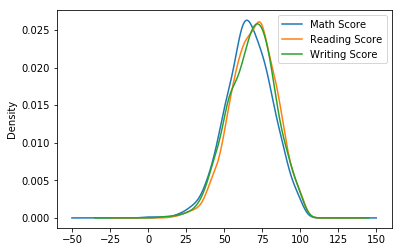

In [16]:
df['math score'].plot(kind='kde')
df['reading score'].plot(kind='kde')
df['writing score'].plot(kind='kde')
_ = plt.legend(['Math Score','Reading Score','Writing Score'])

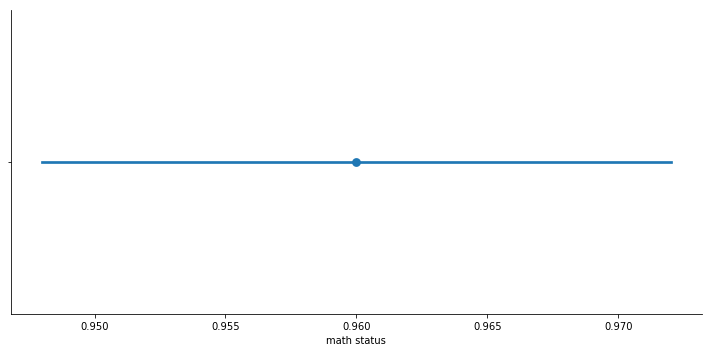

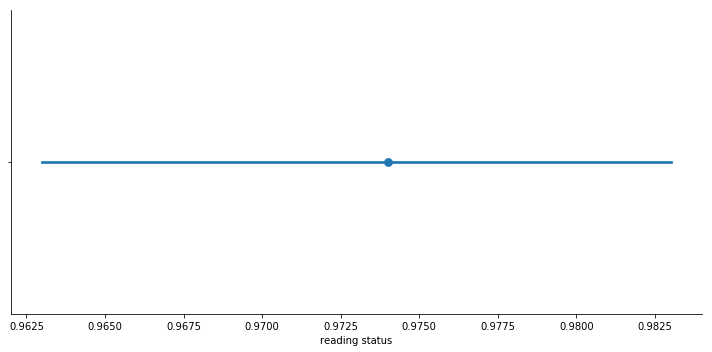

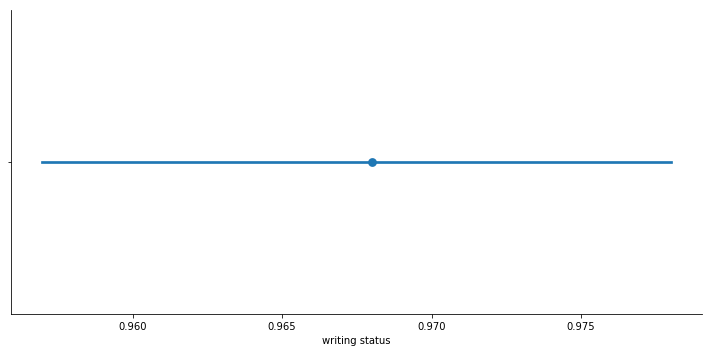

In [17]:
for i,col in enumerate(['math status','reading status','writing status']):
    sns.catplot(x=col,data = df,kind='point',aspect=2)

According to the above graph:
* **96%** Students has been passed in **Mathematics**
* More than **97%** students has been passed in **Reading**
* More than **96.5%** students has been passed in **Writing**

In [18]:
df['Percentage'] = round((df['math score']+df['reading score']+df['writing score'])/3,2)

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,Final Result,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1,1,72.67
1,female,group C,some college,standard,completed,69,90,88,1,1,1,1,82.33
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,1,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,1,1,49.33
4,male,group C,some college,standard,none,76,78,75,1,1,1,1,76.33


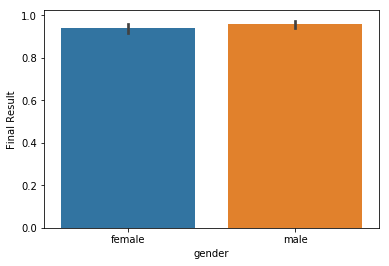

In [20]:
sns.barplot(x='gender',y='Final Result',data=df)

In [21]:
print('Male Passed   :',round(df['Final Result'][df['gender']=='male'].value_counts(normalize=True)[1]*100,2),'%')
print('Female Passed :',round(df['Final Result'][df['gender']=='female'].value_counts(normalize=True)[1]*100,2),'%')

Male Passed   : 95.85 %
Female Passed : 94.02 %


### Data Cleaning

In [22]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [23]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [24]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [25]:
df.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [26]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [27]:
# Firstly, convert binary data 
df.gender = np.where(df.gender=='female',0,1)
df.lunch = np.where(df.lunch == 'standard',1,0)
df['test preparation course'] = np.where(df['test preparation course']=='none',0,1)

# Secondly, convert other data into numerical using map function
map1 = {"bachelor's degree":3, 'some college':4, "master's degree":5,
       "associate's degree":6, 'high school':1, 'some high school':2}
df['parental level of education'] = df['parental level of education'].map(map1)

map2 = {'group B':2, 'group C':3, 'group A':1, 'group D':4, 'group E':5}
df['race/ethnicity'] = df['race/ethnicity'].map(map2)

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math status,reading status,writing status,Final Result,Percentage
0,0,2,3,1,0,72,72,74,1,1,1,1,72.67
1,0,3,4,1,1,69,90,88,1,1,1,1,82.33
2,0,2,5,1,0,90,95,93,1,1,1,1,92.67
3,1,1,6,0,0,47,57,44,1,1,1,1,49.33
4,1,3,4,1,0,76,78,75,1,1,1,1,76.33


## Modelling

In [29]:
from sklearn.model_selection import train_test_split
features = df.drop('Final Result',axis = 1)
labels = df['Final Result']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2)

> #### 1. Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
Y_lr = lm.predict(x_test)

In [31]:
lm.intercept_,lm.coef_

(-0.27615221436510085,
 array([-0.00464376, -0.00072914,  0.00148868,  0.00215358, -0.00166068,
         0.08412034,  0.08393066,  0.08415511,  0.69163093,  0.15874878,
         0.37492219, -0.25159138]))

In [32]:
Yhat_lr = np.where(Y_lr>0.5,1,0)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_lr  = round(accuracy_score(y_test,Yhat_lr),3)
precision_lr = round(precision_score(y_test,Yhat_lr),3)
recall_lr    = round(recall_score(y_test,Yhat_lr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lr*100,precision_lr*100,recall_lr*100))

Accuracy  : 99.5% 
Precision : 99.5% 
Recall    : 100.0% 


#### 2. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
Yhat_lgr = lgr.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
accuracy_lgr = round(accuracy_score(y_test,Yhat_lgr),3)
precision_lgr = round(precision_score(y_test,Yhat_lgr),3)
recall_lgr = round(recall_score(y_test,Yhat_lgr),3)
print("Accuracy  : {}% \nPrecision : {}% \nRecall    : {}% ".format(accuracy_lgr*100,precision_lgr*100,recall_lgr*100))

Accuracy  : 98.5% 
Precision : 98.5% 
Recall    : 100.0% 
